---
### 8.3.1 常微分方程的符号解

In [1]:
import sympy as sp
sp.init_printing(use_latex=True)

1. 求解微分方程 $y'=-2y+2x^2+2x,\ y(0)=1$

In [2]:
x = sp.symbols('x', real=True)
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x), -2*y(x) + 2*x**2 + 2*x)
s = sp.dsolve(eq, ics={y(0):1})     # ics for Initial ConditionS
s.simplify()

2. 求解二阶线性微分方程 $y''-2y'+y={\rm e}^x,\ y(0)=1,\ y'(0)=-1$

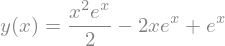

In [3]:
x = sp.symbols('x', real=True)
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x, 2) - 2*y(x).diff(x) + y(x), sp.exp(x))
ics = {y(0):1, y(x).diff(x).subs(x, 0):-1}
s =  sp.dsolve(eq, ics=ics)
s.expand()

3. 已知输入信号为 $u(t)={\rm e}^{-t}\cos t$，求下面微分方程的解
   $$
   y^{(4)}(t)+10y^{(3)}(t)+35y''(t)+50y'(t)+24y(t)=u''(t),\\[1ex]
   y(0)=0,\ y'(0)=-1,\ y''(0)=1, y^{(3)}(0)=1
   $$

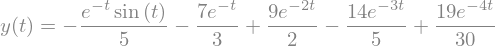

In [4]:
t = sp.symbols('t', real=True)
y = sp.Function('y')(t)
u = sp.exp(-t)*sp.cos(t)
eq = sp.Eq(y.diff(t,4) + 10*y.diff(t,3) + 35*y.diff(t,2) + 50*y.diff(t) + 24*y, u.diff(t, 2))
ics = {y.subs(t,0):0, y.diff(t).subs(t,0):-1, y.diff(t,2).subs(t,0):1, y.diff(t,3).subs(t,0):1}
s = sp.dsolve(eq, ics=ics)
s.expand()

4. 求常微分方程组
   $$
   \begin{cases}
   \dfrac{{\rm d}{\boldsymbol x}}{{\rm d}{t}} = \boldsymbol {Ax},\\[1ex]
   {\boldsymbol x}(0)=[1,1,1]^{\rm T}
   \end{cases}
   $$
   其中 
   $$
   \boldsymbol x(t)=\left[x_1(t),x_2(t),x_3(t)\right]^{\rm T},\ \boldsymbol A=
   {\begin{bmatrix}
   3   &-1 &1\\
   2   &0  &-1\\
   1   &-1 &2
   \end{bmatrix}}
   $$

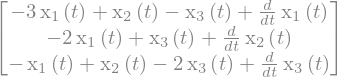

In [5]:
t = sp.symbols('t', real=True)
x1, x2, x3 = sp.var('x1:4', cls=sp.Function)
x = sp.Matrix([x1(t), x2(t), x3(t)])
A = sp.Matrix([[3, -1, 1], [2, 0, -1], [1, -1, 2]])
eq = x.diff(t) - A @ x
eq

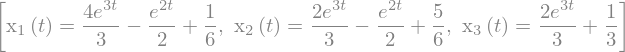

In [6]:
s = sp.dsolve(eq, ics={x1(0):1, x2(0):1, x3(0):1})
s

### 8.3.2 常微分方程的数值解
Python 只能求一阶常微分方程 (组) 的数值解，高阶微分方程必须化成一阶方程组求解
```python
sol = odeint(func, y0, t)   # func为方程组的rhs，y0为各y的初值，t为自变量序列，sol为与t对应的各y的序列
```
`func`：方程组的右侧 $y_1'(x), y_2'(x),\cdots, y_m'(x)$

`y0`：函数初值 $y_1(0), y_2(0),\cdots, y_m(0) $

`t`：自变量序列 $t_1, t_2, \cdots, t_n$

`sol`：`t` 对应的函数值序列 $\begin{bmatrix}y_1\left(t_0\right) &y_2\left(t_0\right) &\cdots &y_m\left(t_0\right)\\y_1\left(t_1\right) &y_2\left(t_1\right) &\cdots &y_m\left(t_1\right)\\ \vdots &\vdots &  &\vdots\\ y_1\left(t_n\right) &y_2\left(t_n\right) &\cdots &y_m\left(t_n\right)\\  \end{bmatrix}$
> 本质上就是给定导数值和初值，求任意多处的函数值

In [7]:
from scipy.integrate import odeint
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

1. 求解微分方程 $y'=-2y+2x^2+2x,\ y(0)=1$

In [8]:
dy = lambda y, x: -2*y + 2*x**2 + 2*x
xx = np.linspace(0, 3, 100)
ns = odeint(dy, 1, xx)       # ns for Numerical Solution
ns = ns.flatten()
ns

array([1.        , 0.94211224, 0.88951915, 0.8420174 , 0.79941559,
       0.76153354, 0.72820176, 0.69926069, 0.67456002, 0.65395846,
       0.63732295, 0.62452825, 0.6154565 , 0.60999678, 0.60804467,
       0.60950191, 0.61427601, 0.6222799 , 0.63343165, 0.64765417,
       0.66487487, 0.68502544, 0.70804158, 0.73386279, 0.7624321 ,
       0.79369591, 0.82760377, 0.86410819, 0.90316448, 0.94473058,
       0.98876689, 1.03523614, 1.08410327, 1.13533527, 1.18890107,
       1.24477143, 1.30291882, 1.36331734, 1.42594262, 1.4907717 ,
       1.55778299, 1.62695616, 1.69827208, 1.77171275, 1.84726121,
       1.92490152, 2.00461866, 2.0863985 , 2.17022774, 2.25609386,
       2.34398509, 2.43389034, 2.52579917, 2.61970176, 2.71558886,
       2.81345177, 2.9132823 , 3.01507274, 3.11881584, 3.22450477,
       3.3321331 , 3.44169479, 3.55318415, 3.66659581, 3.78192472,
       3.89916616, 4.01831564, 4.13936896, 4.26232217, 4.38717154,
       4.51391357, 4.64254495, 4.77306258, 4.90546354, 5.03974

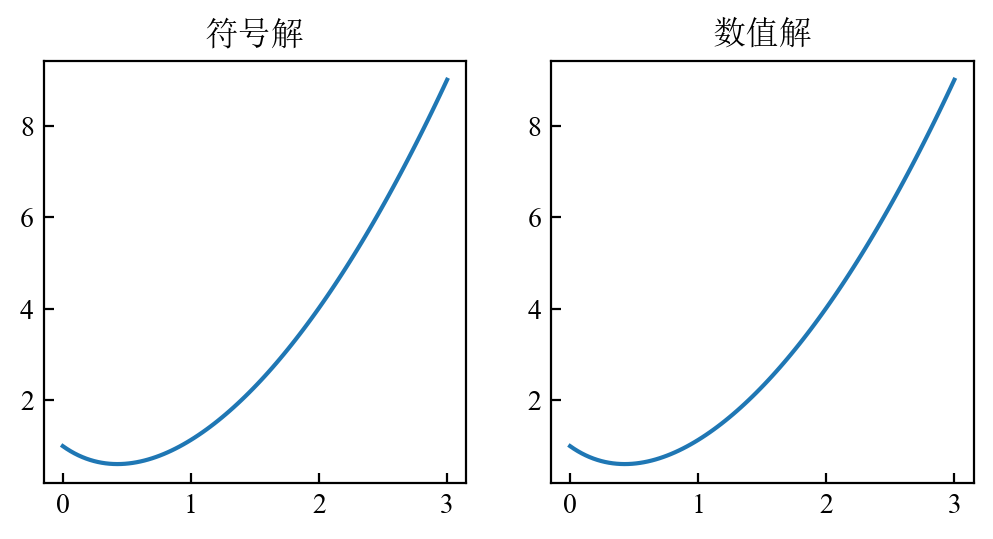

In [9]:
x = sp.symbols('x', real=True)
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x), -2*y(x) + 2*x**2 + 2*x)
ss = sp.dsolve(eq, ics={y(0):1})
ss = sp.lambdify(x, ss.args[1], 'numpy')    # 符号函数转为匿名函数

fig = plt.figure()
def plot(ax, x, y, title):
    ax.plot(xx, ss(xx))
    ax.set_title(title)
    ax.set_box_aspect(1)
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
plot(ax, xx, ss(xx), '符号解')
plot(ax1, xx, ns, '数值解')
fig.show()

2. 求解二阶线性微分方程
   $$
   \begin{cases}
   (1-x)y''=\dfrac{1}{5}\sqrt{1+\left(y'\right)^2},\quad 0<x\leq1\\
   y(0)=0,\ y'(0)=0
   \end{cases}
   $$
   [SOL]：引入 $y_1=y$，$y_2=y'$，则可转化为如下的一阶微分方程组：
   $$
   \begin{cases}
   y_1'=y_2,\quad &y_1(0)=0\\
   y_2'=\dfrac{1}{5(1-x)}\sqrt{1+y_2^2},\quad &y_2(0)=0\\
   \end{cases}
   $$

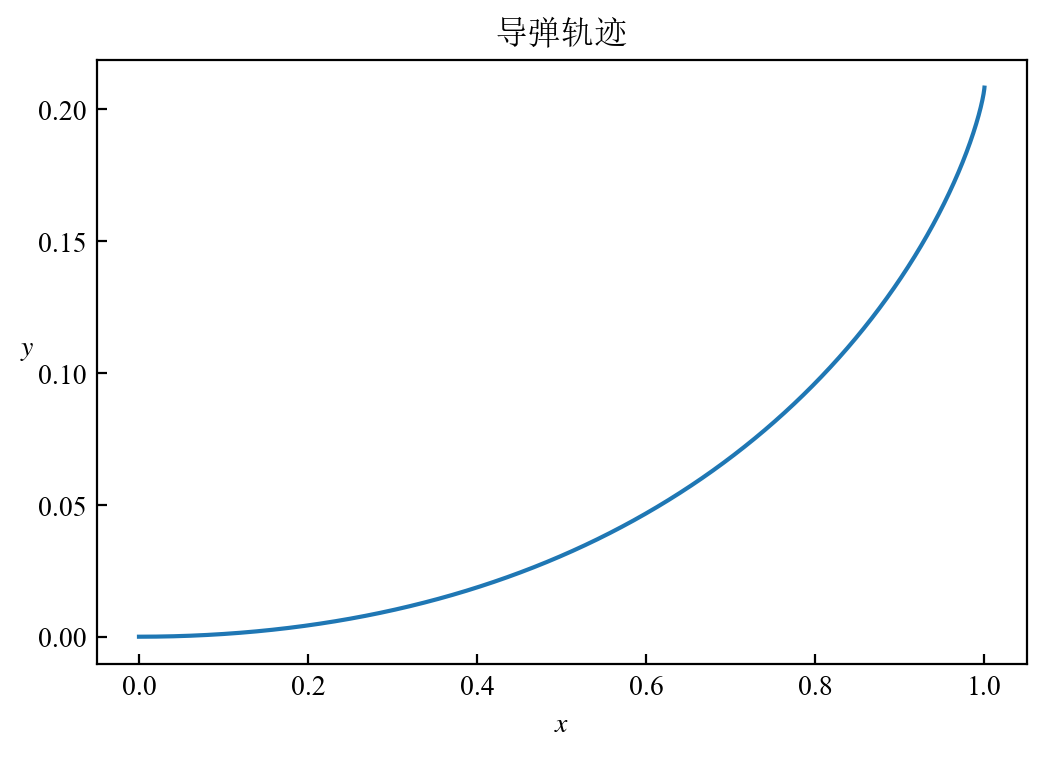

In [10]:
def rhs(y, x):
    y1, y2 = y
    return [
        y2,
        np.sqrt(1 + y2**2) / (5*(1-x))
    ]
x0 = np.arange(0, 1, 0.00001)
y0 = odeint(rhs, [0,0], x0)[:,0]     # 只需 y1

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
ax.set_title("导弹轨迹")
ax.plot(x0, y0)
fig.show()

3. 洛伦兹模型的混沌效应
   $$
   \begin{cases}
   \dot x=\sigma(y-x),\\
   \dot y=\rho x-y-xz,\\
   \dot z=xy-\beta z
   \end{cases}
   $$
   系统中 3 个参数的选择对系统是否进入混沌状态起着重要性作用

In [11]:
np.random.seed(2)

sigma, rho, beta = 10, 28, 8/3
def rhs(f, t):      # 自洽常微分方程组，不显含时间变量
    x, y, z = f
    return [
        sigma*(y - x),
        rho*x - y - x*z,
        x*y - beta*z,
    ]
t0 = np.linspace(0, 50, 5000)
xyzdot = np.random.rand(3)
ns1 = odeint(rhs, xyzdot, t0)
xyzdot += 1e-6                  # 初值敏感
ns2 = odeint(rhs, xyzdot, t0)

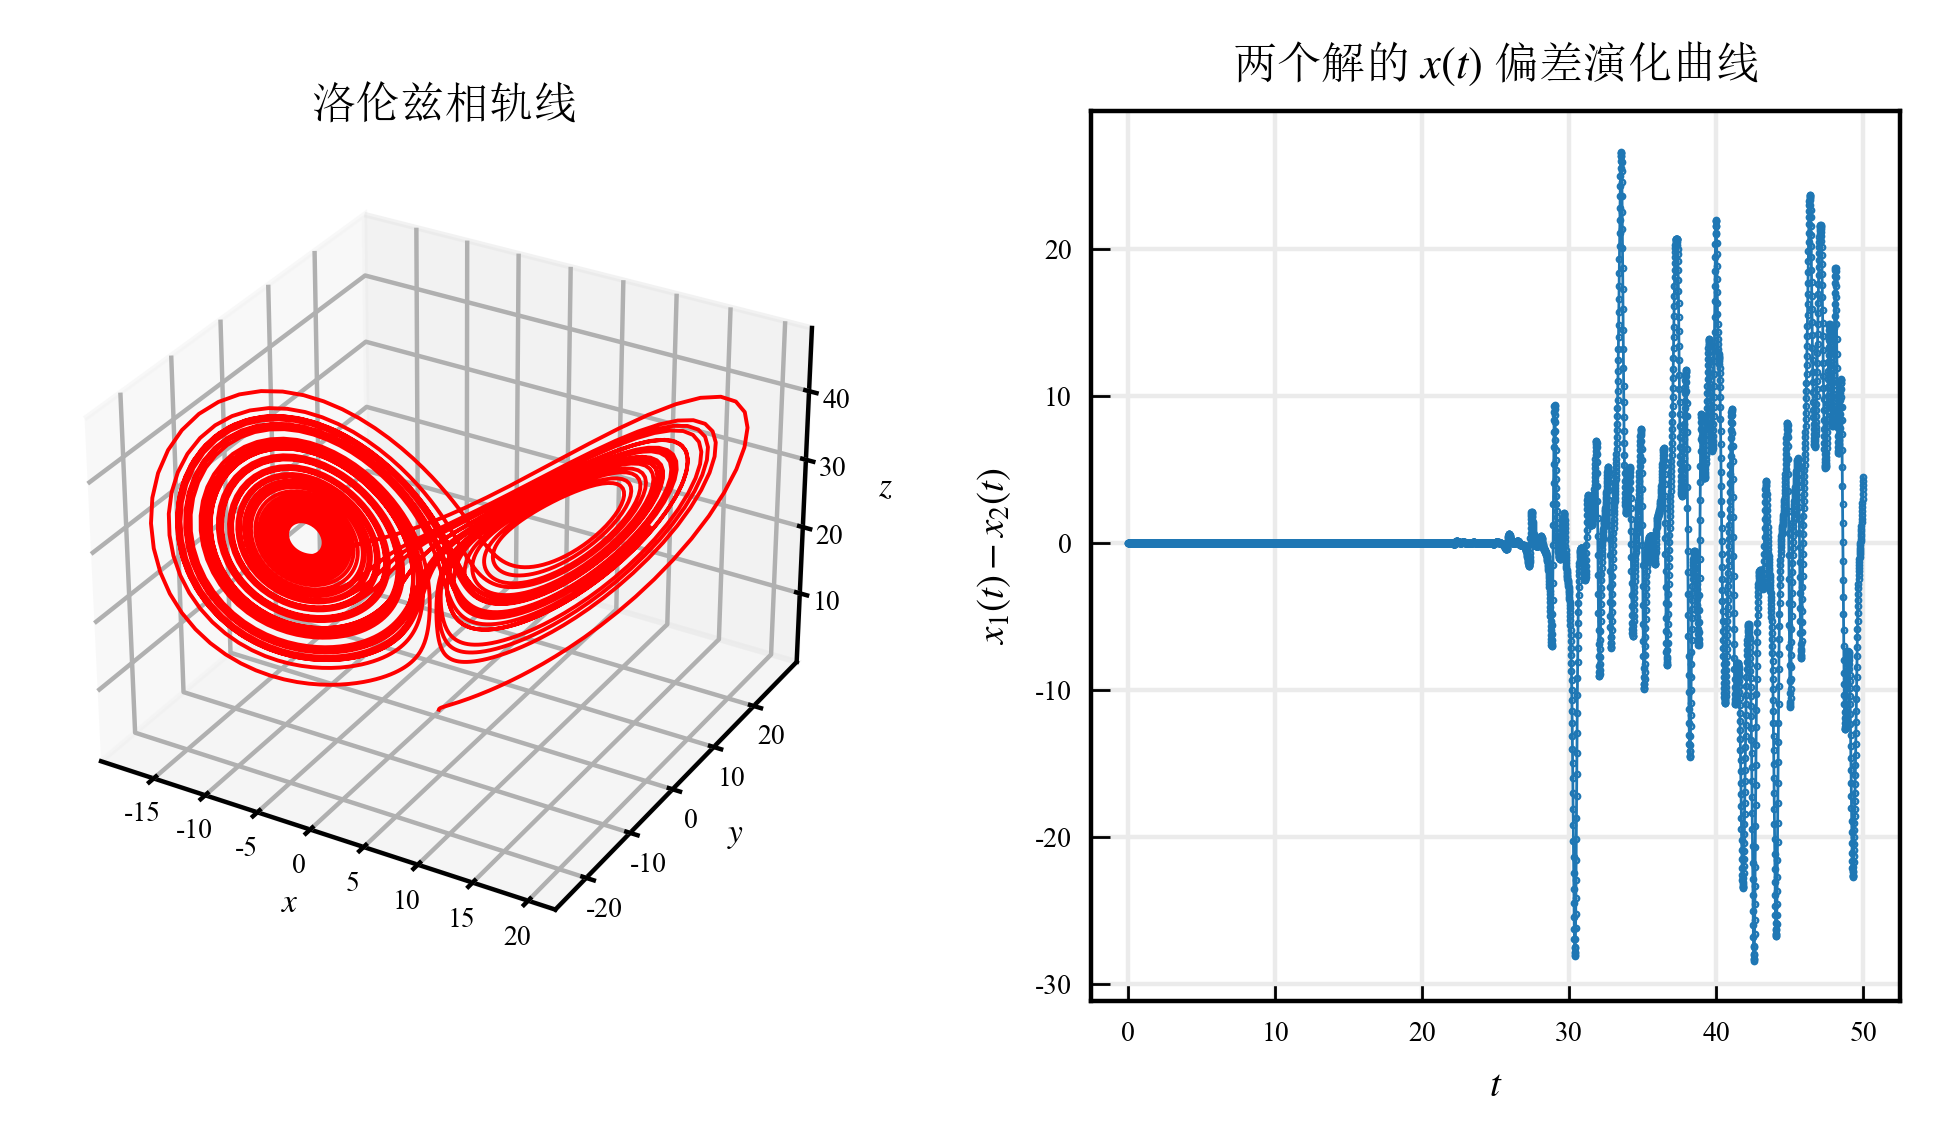

In [12]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(121, projection='3d')
ax.plot(ns1[:,0], ns1[:,1], ns1[:,2], 'r', linewidth=0.7)
ax.set_xlabel('$x$', fontsize=6, labelpad=-12)
ax.set_ylabel('$y$', fontsize=6, labelpad=-12)
ax.set_zlabel('$z$', fontsize=6, labelpad=-12)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='x', pad=-5)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='y', pad=-5)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='z', pad=-5)
ax.set_title("洛伦兹相轨线", fontsize=8)

ax1 = fig.add_subplot(122)
ax1.plot(t0, ns1[:,0]-ns2[:,0],  '.-', linewidth=0.5, markersize=0.8)
ax1.set_xlabel("$t$", fontsize=7)
ax1.set_ylabel("$x_1(t)-x_2(t)$", fontsize=7)
ax1.tick_params(which='major', width=0.5, labelsize=5, axis='x')
ax1.tick_params(which='major', width=0.5, labelsize=5, axis='y')
ax1.set_title("两个解的 "+"$x(t)$"+' 偏差演化曲线', fontsize=8)
ax1.grid(color='0.92')
ax1.set_aspect(1)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.show()

4. 狗追人模型

   人在平面上按一定规律跑步，狗以恒定速率跑向人，运动方向始终指向人

In [13]:
t1 = np.linspace(0, 3.4068, 100)
def rhs(f, t, w):
    x, y = f
    return [
        w/np.sqrt((10+20*np.cos(t)-x)**2 + (20+15*np.sin(t)-y)**2)*(10 + 20*np.cos(t) - x),
        w/np.sqrt((10+20*np.cos(t)-x)**2 + (20+15*np.sin(t)-y)**2)*(20 + 15*np.sin(t) - y),
    ]
ns1 = odeint(rhs, [0,0], t1, args=(20,))    # args provide w
x1, y1 = ns1.T

t2 = np.linspace(0, 50, 501)
ns2 = odeint(rhs, [0,0], t2, args=(5,))
x2, y2 = ns2.T

In [14]:
def distance(xy, t):
    x, y = xy
    x_human = 10 + 20*np.cos(t)
    y_human = 20 + 15*np.sin(t)
    return np.sqrt((x - x_human)**2 + (y - y_human)**2)
d1 = distance([x1, y1], t1)
d2 = distance([x2, y2], t2)

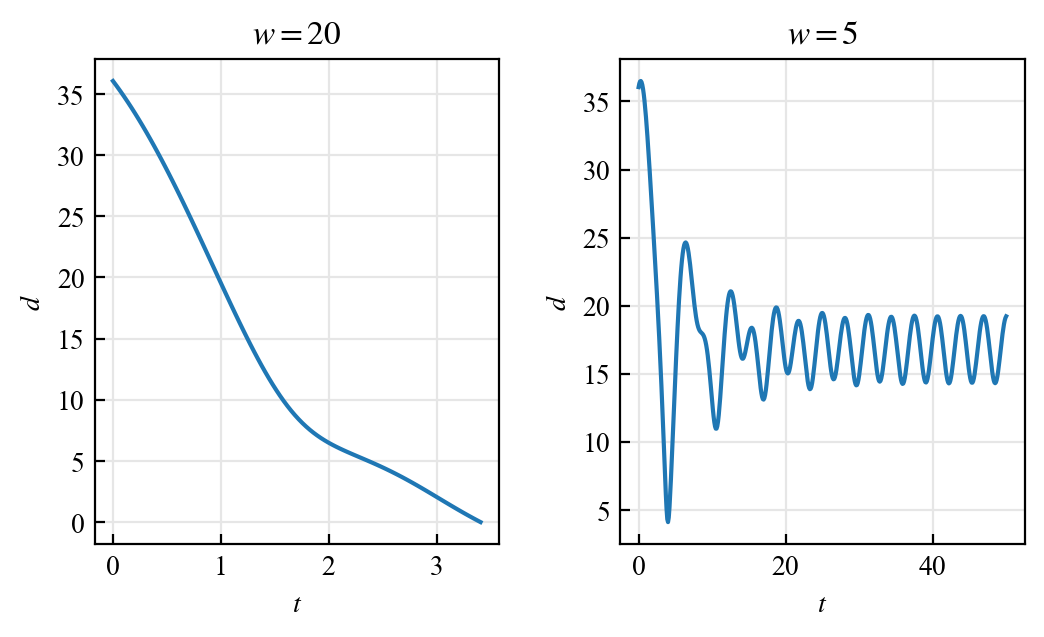

In [15]:
fig = plt.figure()

def plot(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$d$')
    ax.grid(color='0.9')
    ax.set_box_aspect(1.2)
ax = fig.add_subplot(121)
plot(ax, t1, d1, "$w=20$")
ax1 = fig.add_subplot(122)
plot(ax1, t2, d2, "$w=5$")

fig.subplots_adjust(wspace=0.3)
fig.show()

5. 求解二阶线性微分方程 $y''-2y'+y={\rm e}^x,\ y(0)=1,\ y'(0)=-1$ 在区间 $[-1,1]$ 上的数值解，并与符号解进行比较
   
   [SOL]：先做变量替换 $y_1=y,\ y_2=y'$，则原二阶方程可化为如下一阶方程组：
   $$
   \begin{cases}
   y_1'=y_2, &y_1(0)=1\\
   y_2'=2y_2-y_1+{\rm e}^x, &y_2(0)=-1
   \end{cases}
   $$



In [16]:
def rhs(y, x):
    y1, y2 = y
    return [
        y2,
        2*y2 - y1 + np.exp(x)
    ]
xx1 = np.linspace(0, -1, 51)    # odient解决的是初值问题，即y(0)=..，要求 t必须从0开始，所以需要在 0处断开
xx2 = np.linspace(0, 1, 51)
ns1 = odeint(rhs, [1,-1], xx1)[:,0]  # 只保留 y1即可
ns2 = odeint(rhs, [1,-1], xx2)[:,0]
ns = np.hstack([ns1[::-1], ns2[1:]])    # ns1 反向，ns2 去掉 0

In [17]:
x = sp.symbols('x')
y = sp.Function('y')
eq = sp.Eq(y(x).diff(x,2) - 2*y(x).diff(x) + y(x), sp.exp(x))
ss = sp.dsolve(eq, ics={y(0):1, y(x).diff(x).subs(x, 0):-1})
ssf = sp.lambdify(x, ss.args[1], 'numpy')
xx = np.linspace(-1, 1, 101)
ss = ssf(xx)

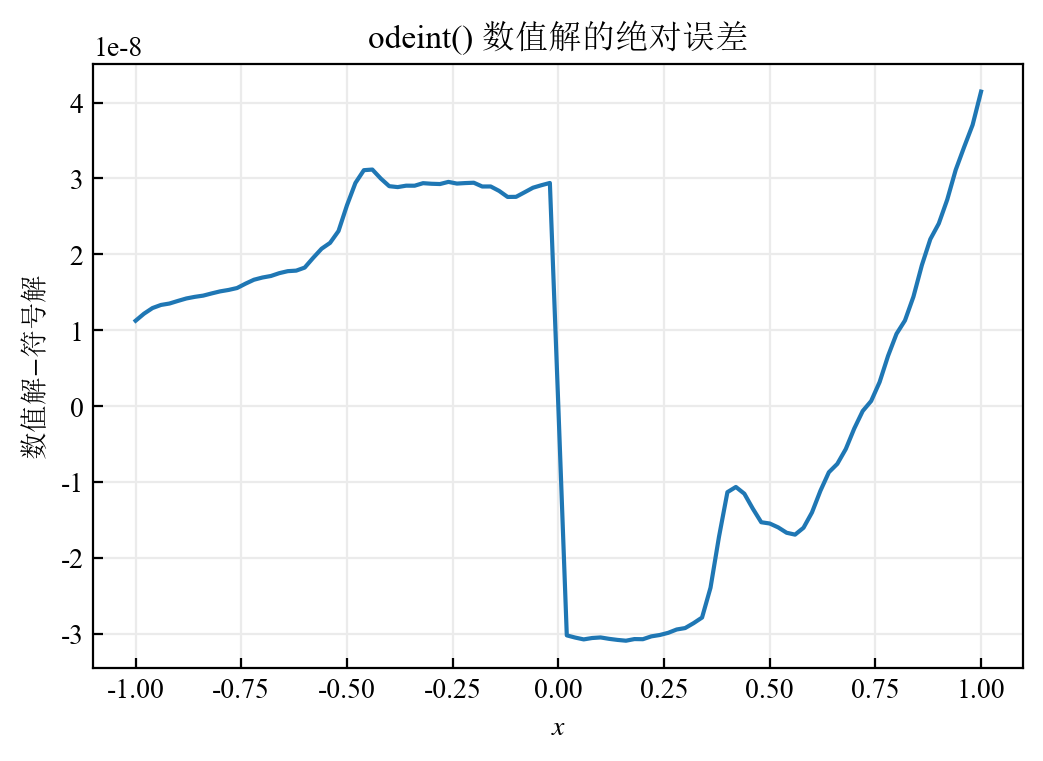

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, ns - ss)
ax.set_xlabel('$x$')
ax.set_ylabel('数值解'+'$-$'+'符号解')
ax.set_title('odeint() 数值解的绝对误差')
ax.grid(color='0.92')
fig.show()

6. “阿波罗”卫星的运动轨迹 $(x,y)$ 满足下列方程
   $$
   \begin{cases}
   \dfrac{{\rm d}^2x}{{\rm d}t}=2\dfrac{{\rm d}y}{{\rm d}t}+x-\dfrac{\lambda(x+\mu)}{r_1^3}-\dfrac{\mu(x-\lambda)}{r_2^3}\\[2ex]
   \dfrac{{\rm d}^2y}{{\rm d}t}=-2\dfrac{{\rm d}x}{{\rm d}t}+y-\dfrac{\lambda y}{r_1^3}-\dfrac{\mu y}{r_2^3}
   \end{cases}
   $$
   其中，$\mu=1/82.45$，$\lambda=1-\mu$，$r_1=\sqrt{(x+\mu)^2+y^2}$，$r_2=\sqrt{(x+\lambda)^2+y^2}$
   
   在初值 $x(0)=1.2$，$x'(0)=0$，$y(0)=0$，$y'(0)=-1.0494$ 下求解，并绘制“阿波罗”卫星轨迹图
   
   [SOL]：作变量替换，令 $z_1=x$，$z_2=x'$，$z_3=y$，$z_4=y'$

In [19]:
def Apollo(f, x, u):
    z1, z2, z3, z4 = f
    _lambda, mu = u
    return [
        z2,
        2*z4 + z1 - (_lambda*(z1+mu))/((z1+mu)**2+z3**2)**(3/2) - (mu*(z1-_lambda))/((z1+_lambda)**2+z3**2)**(3/2),
        z4,
        -2*z2 + z3 - (_lambda*z3)/((z1+mu)**2+z3**2)**(3/2) - (mu*z3)/((z1+_lambda)**2+z3**2)**(3/2),
    ]
y0 = np.array([1.2, 0, 0, -1.0494])
t = np.linspace(0, 100, 1001)
mu = 1/82.45
_lambda = 1 - mu
u0 = np.array([_lambda, mu])
ns = odeint(Apollo, y0, t, args=(u0,))
x, y = ns[:,0], ns[:,2]

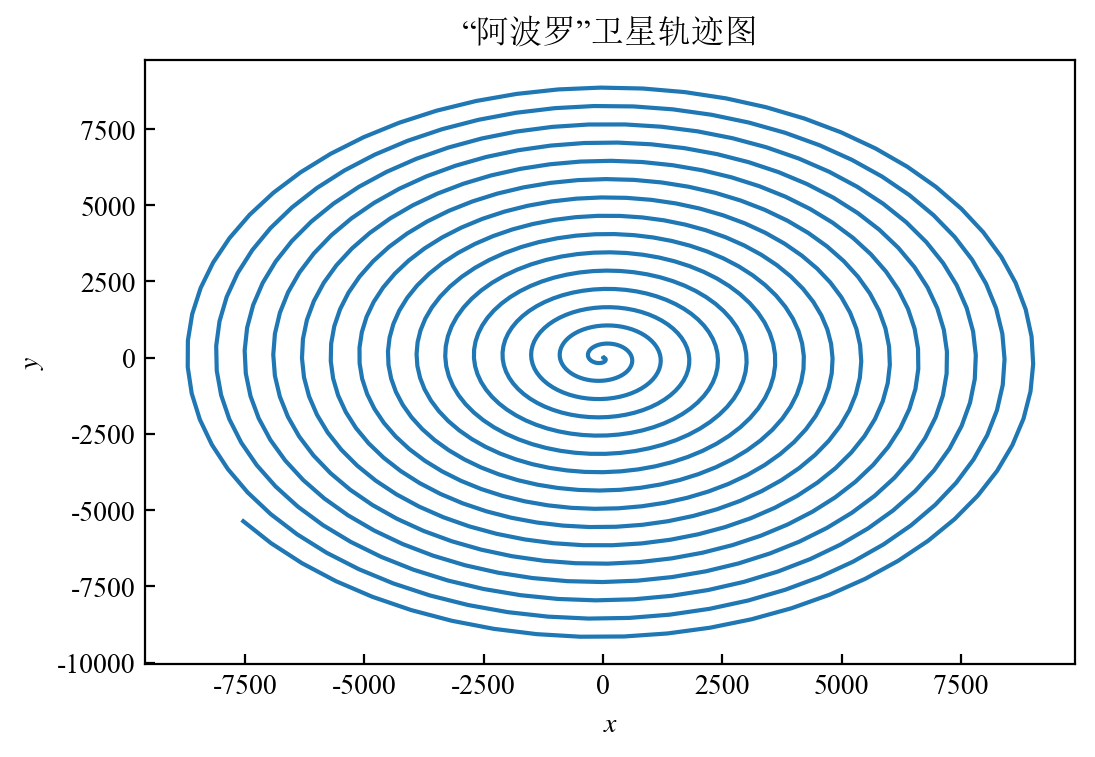

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title("“阿波罗”卫星轨迹图")
fig.show()